# Fourieranalys av Kopplade svängningar

### Läs in data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.fft import fft, ifft, fftfreq
from scipy.signal import savgol_filter
from pathlib import Path
from pandas.errors import EmptyDataError

# Hämta alla .tsv-filer i katalogen "data"
file_paths = list(Path("data").glob("*.tsv"))

# Skapa en ordbok (dict) där nyckeln = filnamn utan ändelse, värdet = dataframe
dfs = {}

for path in file_paths:
    try:
        name = path.stem  # Filnamn utan .tsv
        df = pd.read_csv(path, sep='\t', header=None)
        dfs[name] = df
        print(f"Läste in {name}")
    except EmptyDataError:
        print(f"! Fel vid inläsning av {path}. Filen är tom eller saknas.")
    except Exception as e:
        print(f"! Fel vid inläsning av {path}. {e}")
print(f"\nInlästa dataset:\n{list(dfs)}")

# Exempel: komma åt en specifik dataframe
df_1_f1 = dfs["1_f1"]
df_1_f1.columns = ["x2", "y2", "z2", "x1", "y1", "z1"]

df_2_f2 = dfs["2_f2"]
df_2_f2.columns = ["x2", "y2", "z2", "x1", "y1", "z1"]

Läste in 1_f3
Läste in 2_f1
Läste in 1_bad
Läste in 2_f2
Läste in 4_f1
! Fel vid inläsning av data/1_f2_notgood.tsv. Filen är tom eller saknas.
Läste in 1_dålig
Läste in 3_f1
Läste in 2_dålig
Läste in 13_uneven_z
Läste in 2_bad
Läste in 5_f1
Läste in 1_f1

Inlästa dataset:
['1_f3', '2_f1', '1_bad', '2_f2', '4_f1', '1_dålig', '3_f1', '2_dålig', '13_uneven_z', '2_bad', '5_f1', '1_f1']


### The real deal

Egenvärden (ω²): [ 53.40782569 609.92698971]
Egenfrekvenser (ω): [ 7.3080658  24.69669998]
Egenmoder (Φ):
 [[-0.25895097 -1.37334242]
 [-0.98278212  0.18530876]]

Kontroll av ortogonalitet Φᵀ M Φ ≈ I:
 [[1.00000000e+00 5.97096756e-17]
 [5.87418252e-17 1.00000000e+00]]

Efter normalisering Φᵀ M Φ =
 [[ 1.00000000e+00 -1.53915251e-08]
 [-1.53915251e-08  1.00000000e+00]]


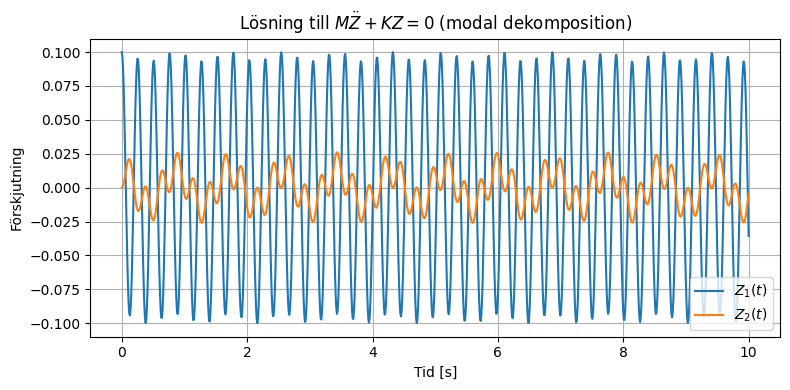

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# --- 1. Definiera mass- och styvhetsmatriser ---
M = np.array([[0.512, 0.0],
              [0.0, 0.9998]])
K = np.array([[230.0+72.5, -72.5],
              [-72.5, 72.5]])

# --- 2. Lös generaliserat egenvärdesproblem KΦ = MΦΩ² ---
# eigh är för symmetriska (positivt definita) M, K
omega2, Phi = eigh(K, M)

# --- 3. Sortera efter ökande egenfrekvens ---
idx = np.argsort(omega2)
omega2 = omega2[idx]
Phi = Phi[:, idx]
omega = np.sqrt(omega2)

print("Egenvärden (ω²):", omega2)
print("Egenfrekvenser (ω):", omega)
print("Egenmoder (Φ):\n", Phi)

# --- 4. Kontrollera ortogonalitet ---
check = Phi.T @ M @ Phi
print("\nKontroll av ortogonalitet Φᵀ M Φ ≈ I:\n", check)

# --- 5. Normalisera så att Φᵀ M Φ = I ---
Mnorm = Phi.T @ M @ Phi
Phi = Phi @ np.linalg.inv(np.sqrt(Mnorm))

# verifiera igen
print("\nEfter normalisering Φᵀ M Φ =\n", Phi.T @ M @ Phi)

# --- 6. Initialvillkor ---
Z0 = np.array([0.1, 0.0])
V0 = np.array([0.0, 0.0])

# --- 7. Transformera till modal koordinater ---
q0 = Phi.T @ M @ Z0
dq0 = Phi.T @ M @ V0

# --- 8. Analytisk lösning ---
t = np.linspace(0, 10, 1000)
q_t = np.zeros((2, len(t)))

for i in range(2):
    w = omega[i]
    q_t[i, :] = q0[i]*np.cos(w*t) + dq0[i]/w*np.sin(w*t)

# --- 9. Transformera tillbaka till fysiska koordinater ---
Z_t = Phi @ q_t

# --- 10. Plotta resultaten ---
plt.figure(figsize=(8, 4))
plt.plot(t, Z_t[0, :], label='$Z_1(t)$')
plt.plot(t, Z_t[1, :], label='$Z_2(t)$')
plt.title("Lösning till $M\\ddot{Z} + KZ = 0$ (modal dekomposition)")
plt.xlabel("Tid [s]")
plt.ylabel("Förskjutning")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[10.96887373  4.23689362  0.10090478  0.1006283   0.10054482  0.06584798
  0.06573775  0.06533091  0.04753058  0.04724667  0.04720363  0.04687402
  0.03681573  0.03681085  0.03669754  0.03044597  0.03044815  0.03044954
  0.03041909  0.02644326  0.02627755  0.02624976  0.02626897  0.02334063
  0.02339953  0.02339879  0.02338552  0.0212699   0.02128459  0.02140459
  0.02133334  0.01981657  0.01980476  0.02000567  0.01996072  0.01890051
  0.01878074  0.01898286  0.01904599  0.01898046  0.0180881   0.01810063
  0.01814191  0.01838789  0.01843162  0.01842718  0.01838226  0.0177066
  0.01772919  0.01802367  0.01813334  0.01817607  0.01812633  0.01811814
  0.0176364   0.01759566  0.01759566  0.0176364   0.01811814  0.01812633
  0.01817607  0.01813334  0.01802367  0.01772919  0.0177066   0.01838226
  0.01842718  0.01843162  0.01838789  0.01814191  0.01810063  0.0180881
  0.01898046  0.01904599  0.01898286  0.01878074  0.01890051  0.01996072
  0.02000567  0.01980476  0.01981657  0.02133334  0.0

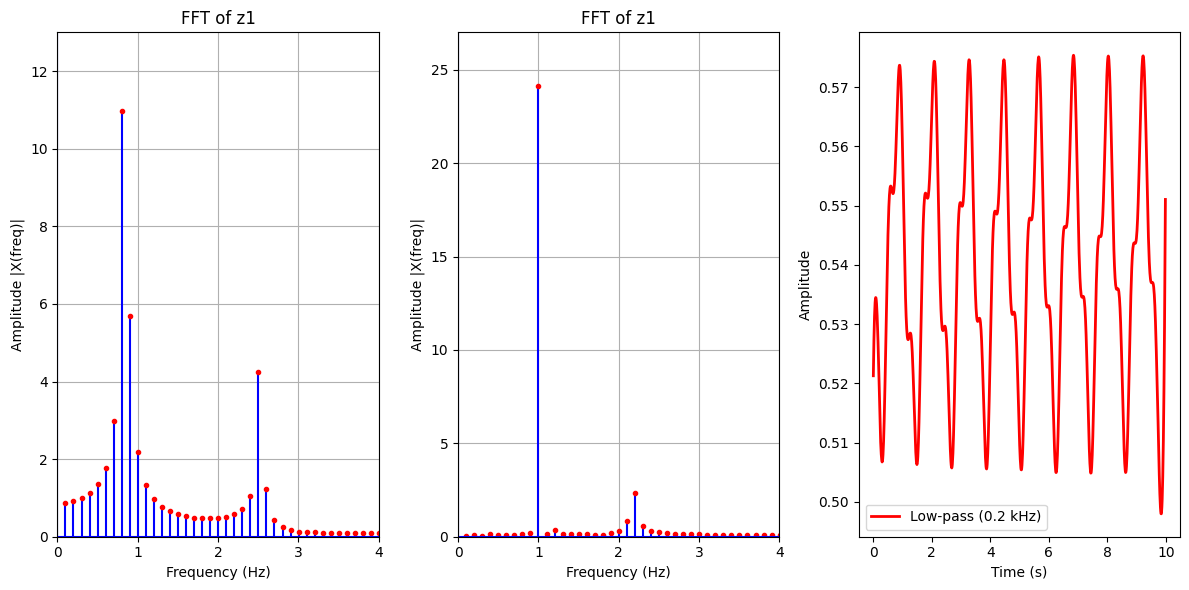

538.6817181271799
2.9855990134880335
10.968873732198062
5.6913208180736135
2.1808005149141607
4.236893619526425
4.236893619526425
2.1808005149141607
5.6913208180736135
10.968873732198062
2.9855990134880335


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import savgol_filter
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# === Load data ===
# CSV file contains a single column of Z positions (no header)
start, end = 20, 999
t_range = range(start, end)
z1_diff = pd.read_csv("z1_diff.csv", header=None).squeeze().to_numpy()[t_range]
z2_diff = pd.read_csv("z2_diff.csv", header=None).squeeze().to_numpy()[t_range]

z1 = df_1_f1["z1"].values / 1000
z2 = df_2_f2["z1"].values / 1000
if len(z1) > len(z2):
    t_range = range(0, len(z2))
else:
    t_range = range(0, len(z1))

z1 = z1[t_range]
z2 = z2[t_range]

# === Sampling parameters ===
N = len(z1)
sr = 100        # sampling rate (Hz)
dt = 1 / sr     # sampling interval (s)
t_data = np.arange(N) * dt
freq = fftfreq(N, d=dt)

win = 51 if N >= 51 else (N//2)*2+1  # säkerställ udda
poly = 3 if win > 3 else 1

z1_smooth = savgol_filter(z1, window_length=win, polyorder=poly)
z2_smooth = savgol_filter(z2, window_length=win, polyorder=poly)

dz1_dt = np.gradient(z1_smooth, dt)
dz2_dt = np.gradient(z2_smooth, dt)

# === FFT ===
Z1 = fft(z1_smooth)
Z2 = fft(z2_smooth)

# === Find peaks (local maxima) in the positive frequency range ===
pos_mask = freq > 0
amps1 = np.abs(Z1[pos_mask])
amps2 = np.abs(Z2[pos_mask])
freq_pos = freq[pos_mask]

# Find local maxima
peaks1, _ = find_peaks(amps1, height=np.max(amps1)*0.05)  # 5% height threshold
peaks2, _ = find_peaks(amps2, height=np.max(amps2)*0.05)

# Sort and select the largest few (e.g., top 2)
top_n = 2
top_peaks1 = peaks1[np.argsort(amps1[peaks1])[-top_n:]]
top_peaks2 = peaks2[np.argsort(amps2[peaks2])[-top_n:]]

# === Plot FFT (only positive frequencies) ===
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.stem(freq[:N // 2],
         np.abs(Z1[:N // 2]),
         basefmt="b-",
         linefmt="b-",
         markerfmt="r.")
plt.annotate('Egenfrekvens', xy=(, ampmax[0]), xytext=(6, 1.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude |X(freq)|')
plt.grid()
plt.title('FFT of z1')
#plt.xlim(0, sr / 2)
plt.xlim(0, 4)
plt.ylim(0, 13)

plt.subplot(132)
plt.stem(freq[:N],
         np.abs(Z2[:N]),
         basefmt="b-",
         linefmt="b-",
         markerfmt="r.")
plt.annotate('Egenfrekvens', xy=(5, 1.2), xytext=(6, 1.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude |X(freq)|')
plt.grid()
plt.title('FFT of z1')
#plt.xlim(0, sr / 2)
plt.xlim(0, 4)
plt.ylim(0, 27)

# === Reconstruct low-pass filtered signal (cutoff = 5 Hz) ===
Z1_filtered = Z1.copy()
kHz = 0.2
Z1_filtered[np.abs(freq) > kHz] = 0
reconstructed = np.real(ifft(Z1_filtered))

plt.subplot(133)
plt.plot(t_data, np.abs(ifft(Z1)), 'r', label=f"Low-pass ({kHz} kHz)", linewidth=2)
#plt.plot(t_data, z1_diff, 'b--', label='Original', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

# Exempelmatriser (byt ut mot dina)
M = np.array([[0.512, 0.0],
              [0.0, 0.9998]])
K = np.array([[230.0+72.5, -72.5],
              [-72.5, 72.5]])

MinvK = np.linalg.solve(M, K)   # M^{-1}K

def f(t, x):
    Z = x[:2]
    V = x[2:]
    dZ = V
    dV = -MinvK.dot(Z)
    return np.concatenate([dZ, dV])

Z0 = np.array([z1_diff[0], z1_diff[0]])   # initial displacement
V0 = np.array([np.gradient(z1_diff, t_data)[0], np.gradient(z2_diff, t_data)[0]])   # initial velocity
x0 = np.concatenate([Z0, V0])

t_span = (0.0, 10.0)
t_eval = np.linspace(0, 10, 1001)

sol = solve_ivp(f, t_span, x0, t_eval=t_eval, method='RK45')
Z_t = sol.y[:2, :]   # Z(t) vid de utvärderade tiderna

Nt = len(Z_t[0])
plt.plot(t_data[:Nt], Z_t[0])
plt.plot(t_data[:Nt], Z_t[1])
plt.show()

### Beräkna egenmoder, egenvärden och egenfrekvenser

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# --- 1. Definiera mass- och styvhetsmatriser ---
M = np.array([[0.512, 0.0],
              [0.0, 0.9998]])
K = np.array([[230.0+72.5, -72.5],
              [-72.5, 72.5]])

# --- 2. Lös generaliserat egenvärdesproblem KΦ = MΦΩ² ---
# eigh är för symmetriska (positivt definita) M, K
omega2, Phi = eigh(K, M)

# --- 3. Sortera efter ökande egenfrekvens ---
idx = np.argsort(omega2)
omega2 = omega2[idx]
Phi = Phi[:, idx]
omega = np.sqrt(omega2)

print("Egenvärden (ω²):", omega2)
print("Egenfrekvenser (ω):", omega)
print("Egenmoder (Φ):\n", Phi)

# --- 4. Kontrollera ortogonalitet ---
check = Phi.T @ M @ Phi
print("\nKontroll av ortogonalitet Φᵀ M Φ ≈ I:\n", check)

# --- 5. Normalisera så att Φᵀ M Φ = I ---
Mnorm = Phi.T @ M @ Phi
Phi = Phi @ np.linalg.inv(np.sqrt(Mnorm))

# verifiera igen
print("\nEfter normalisering Φᵀ M Φ =\n", Phi.T @ M @ Phi)

# --- 6. Initialvillkor ---
Z0 = np.array([0.1, 0.0])
V0 = np.array([0.0, 0.0])

# --- 7. Transformera till modal koordinater ---
q0 = Phi.T @ M @ Z0
dq0 = Phi.T @ M @ V0

# --- 8. Analytisk lösning ---
t = np.linspace(0, 10, 1000)
q_t = np.zeros((2, len(t)))

for i in range(2):
    w = omega[i]
    q_t[i, :] = q0[i]*np.cos(w*t) + dq0[i]/w*np.sin(w*t)

# --- 9. Transformera tillbaka till fysiska koordinater ---
Z_t = Phi @ q_t

# --- 10. Plotta resultaten ---
plt.figure(figsize=(8, 4))
plt.plot(t, Z_t[0, :], label='$Z_1(t)$')
plt.plot(t, Z_t[1, :], label='$Z_2(t)$')
plt.title("Lösning till $M\\ddot{Z} + KZ = 0$ (modal dekomposition)")
plt.xlabel("Tid [s]")
plt.ylabel("Förskjutning")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
print(omega / (2*np.pi))

[1.1631148  3.93060188]
